# Jakob Hegley Applied Data Science Capstone Week 3 
# Segmenting and Clustering Neighborhoods in Toronto
## PART 1
## This Notebook involves pulling in the Neighborhood data for Toronto, Canada from a Wikipedia Page

First we shall import most of our packages (some will be added later when necessary)

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib.request

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


We shall use the urllib and BeautifulSoup packages to scrape the Wiki page and parse the resulting HTML lines

In [2]:
!pip install beautifulsoup4
!pip install lxml

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "html.parser")

This next function can be used to view your HTML results in a relatively nice manner, however its output drastically increases the size of this notebook so I shall just leave it as commented. 

The important result is that it allows you to find the necessary table of interest.

The function after it allows us to grab that specific table based on its class. Again viewing this would show us the appropriate table, but it makes the notebook very long. Feel free to uncomment it to see how the table looks as HTML. 

In [5]:
#print(soup.prettify())

In [6]:
right_table=soup.find('table', class_='wikitable sortable')
#right_table

Viewing the above table shows us how the columns and rows are denoted which allows us to further parse the HTML into Python lists.


In [7]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

Next we use these lists to create our necessary DataFrame using Pandas

In [8]:
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


As you can see there is an annoyng remnant in the form of the newspace character after every data point. The following removes this. 

There are simpler ways of doing this ahead of time, but I think this method was good practice and a good chance to see this problem occuring in action.

In [9]:
columns = ['Postal Code', 'Borough', 'Neighborhood']

for i in columns:
    df[i] = df[i].str[:-1]

Next we are moving any and all rows that contain the string "Not assigned". I chose to focus on the Borough column, but this could have been done using the Neighborhood column as well. I also included a re-index. 

I also showed the entire resulting DataFrame which thankfully isn't terribly long. This way we can ensure that everything seems in order. 

In [10]:
df_filtered1 = df[df['Borough'] != 'Not assigned'].reset_index()
df_filtered2 = df_filtered1[columns]
df_filtered2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Finally we show the shape of our DataFrame.

In [11]:
df_filtered2.shape

(103, 3)

# PART 2

For Part 2 we need to include the Latitude and Longitude values for each of these Postal Codes.

I first attempted to use the geocoder method and wrote a for loop to go through each Postal Code. However due to the unreliability of the geocoder API, it was having to do multiply attempted for all 103 Postal Codes, this made the runtime way too long (it never finished in fact).

So in the end I went with the .csv file that was provided.

First I needed to sort the my original DataFrame to match the order of the .csv file.

In [12]:
df_filtered3 = df_filtered2.sort_values(by='Postal Code').reset_index()
df_filtered3 = df_filtered3[columns]
df_filtered3.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Next we load in the .csv file. 

In [13]:
df_latlong = pd.read_csv('http://cocl.us/Geospatial_data')
df_latlong.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Finally we use the .join method to combine these two DataFrames using the Postal Code column as a common match. 

In [14]:
df_final = df_filtered3.join(df_latlong.set_index('Postal Code'), on='Postal Code')
df_final.head(12)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


# PART 3

For Part 3 we are going to map and analyze these neighborhoods using the Foursquare API and the KMeans clustering algorithm to see if we can find some patterns in the areas. 

First we can use Folium to do a general mapping of these Toronto neighborhoods. 

(Notice I did not use the geocoder to find the LAT, LONG for Toronto, I simply Googled it.)

In [17]:
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

for lat, lng, borough, neighborhood in zip(df_final['Latitude'], df_final['Longitude'], df_final['Borough'], df_final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

As the instructions for this part suggested, lets narrow down our boroughs to just those that list the word 'Toronto'.

In [18]:
toronto_data = df_final[df_final['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


Thankfully this cuts our data set down by nearly two thirds.

Now let's map these neighborhoods. 

In [19]:
map_toronto2 = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto2)  
    
map_toronto2

Now we are ready to start pulling data with the Foursquare API, let's begin by setting our credentials.

In [20]:
CLIENT_ID = '2M215C02NXH4FNC1XQ00OC135ZV1GWYJWCA1P2S3A4DZZ1IJ' # your Foursquare ID
CLIENT_SECRET = 'I4SQNCDYTEQBJ0L4YS23NO0SAU5OYLHC211D5025GLUUPOHP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2M215C02NXH4FNC1XQ00OC135ZV1GWYJWCA1P2S3A4DZZ1IJ
CLIENT_SECRET:I4SQNCDYTEQBJ0L4YS23NO0SAU5OYLHC211D5025GLUUPOHP


Here we define a function that does a Foursqaure API call for each particular neighborhood, and then grabs only the data we are interested in. 

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Here we run said function on our Toronto data.

In [23]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

Now we can see that our DataFrame now has all of the top 100 venues in each neighborhood. 

In [24]:
print(toronto_venues.shape)
toronto_venues.head()

(1634, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


Let's do a count of how many venues per neighborhood. 

In [25]:
toronto_venues.groupby('Neighborhood').count()['Venue']

Neighborhood
Berczy Park                                                                                                    57
Brockton, Parkdale Village, Exhibition Place                                                                   22
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto                           16
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport     16
Central Bay Street                                                                                             66
Christie                                                                                                       16
Church and Wellesley                                                                                           72
Commerce Court, Victoria Hotel                                                                                100
Davisville                                                                 

And a count of how many unique venue categories we found. 

In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


We now wish to do some machine learning with our data. First we need to somewhat normalize it into a form that will allow us to apply the KMeans clustering algorithm. 

First thing we do is expand the DataFrame to give each venue category its own column and then give a 1 or 0 into said column if that Venue in that neighborhood falls into that category. 

In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
cols = toronto_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('Neighborhood')))
toronto_onehot = toronto_onehot.reindex(columns= cols)

toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:
toronto_onehot.shape

(1634, 234)

As you can see this has made our DataFrame quite large. In order to eventually apply Kmeans, we need to average each neighborhood to create a frequency table for each venue category in each neighborhood.

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.017544,0.000000,0.0,0.0,0.0000,0.017544,0.0,0.017544,0.035088,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.0,0.0,0.017544,0.0000,0.0,0.0000,0.0,0.017544,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.000000,0.0,0.052632,0.070175,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.000000,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017544,0.0,0.0,0.0,0.000000,0.035088,0.0000,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0

In [30]:
toronto_grouped.shape

(39, 234)

This makes the DataFrame much cleaner. To get a good look at the top 5 most common venues in each neighborhood, you can uncomment the following. (I left it commented because it takes up quite a bit of space.)

In [31]:
#num_top_venues = 5

#for hood in toronto_grouped['Neighborhood']:
#    print("----"+hood+"----")
#    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
#    temp.columns = ['venue','freq']
#    temp = temp.iloc[1:]
#    temp['freq'] = temp['freq'].astype(float)
#    temp = temp.round({'freq': 2})
#    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#    print('\n')

These next two cells define a helpful function that will return the top N most common venues, then we apply this to our DataFrame to show what the top 10 most common venues are in each neighborhood. 

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Café,Beer Bar,Cheese Shop,Farmers Market,Pharmacy,Restaurant,Seafood Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Pet Store,Furniture / Home Store,Convenience Store,Stadium,Restaurant,Italian Restaurant,Intersection
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Comic Shop,Auto Workshop,Brewery,Burrito Place,Spa,Farmers Market,Fast Food Restaurant,Restaurant,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Airport,Rental Car Location,Bar,Coffee Shop,Boat or Ferry,Plane,Boutique
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Burger Joint,Bubble Tea Shop,Bar,Department Store,Salad Place


In order to use this data for Kmeans clustering we need a purely numerical dataset, thus we remove the Neighborhood column of the venue frequency DataFrame. 

In [34]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
toronto_grouped_clustering.head()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0.0000,0.0000,0.000,0.000,0.000,0.0,0.0,0.0,0.017544,0.000000,0.0,0.0,0.0000,0.017544,0.0,0.017544,0.035088,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.0,0.0,0.017544,0.0000,0.0,0.0000,0.0,0.017544,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.000000,0.0,0.052632,0.070175,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.000000,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017544,0.0,0.0,0.0,0.000000,0.035088,0.0000,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0175

Here I design a function that can take in a DataFrame and a start and end pair of K values.

It will run the Kmeans clustering algorithm over all K values from the start value to the end value and then calculate the average distance from each point to its cluster center for each value of K.

Then it plots this average for each K value. 

In [35]:
import matplotlib.pyplot as plt

def KmeanDetermineBestK(start, end, Data_Frame):
    mean_each_k = []
    
    for i in range(start, end+1):
        kclusters = i 
        kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_Frame)
        Data_Frame_copy = Data_Frame.copy()
        Data_Frame_copy['Cluster Labels'] = kmeans.labels_.tolist()
        distance_list = []
        for j in range(0, Data_Frame_copy.shape[0]):
            difference_sq = [(k-m)**2 for k, m in zip(Data_Frame_copy.iloc[j].tolist(), kmeans.cluster_centers_[Data_Frame_copy.at[j, 'Cluster Labels']].tolist())]
            distance = np.sqrt(sum(difference_sq))
            distance_list.append(distance)
        mean_each_k.append(np.array(distance_list).mean())
        
    plt.plot([item for item in range(start, end+1)], mean_each_k, marker = 'o')
    plt.title('K Value vs Mean Distance from Centroids')
    plt.xlabel('K Value')
    plt.ylabel('Mean Distance from Centriods')
    plt.grid(True)
    plt.show() 

Here I run this fucntion from K=2 to K=6. 

Essentually we are utilizing the elbow point method to find where the drop in mean distance drastically changes. 

As we can see here, this happens around K=3, thus this will be our K value of choice to actually apply. 

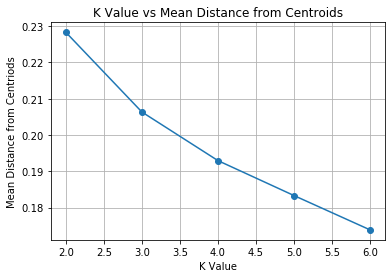

In [36]:
KmeanDetermineBestK(2,6, toronto_grouped_clustering)

Now we actually run the Kmean algorithm.

In [37]:
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

Now that we have our Kmean labeling, we join multiple DataFrames we've worked with into a final DataFrame that has all of the location data, the cluster labeling, and the venue data. 

In [38]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Pub,Health Food Store,Trail,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Bookstore,Juice Bar
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Sandwich Place,Park,Pizza Place,Sushi Restaurant,Pub,Brewery,Fast Food Restaurant,Fish & Chips Shop,Restaurant,Italian Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Bakery,Brewery,Gastropub,Yoga Studio,Food,Pet Store,Park
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,1,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


Now we can even map the neighborhoods and give each one that falls into a different cluster a different color. 

In [39]:
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

To get better insight into why each cluster was made in the way that they were, lets view each cluster by itself. 

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,0,Pub,Health Food Store,Trail,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
1,"The Danforth West, Riverdale",0,Greek Restaurant,Italian Restaurant,Coffee Shop,Furniture / Home Store,Restaurant,Ice Cream Shop,Yoga Studio,Spa,Bookstore,Juice Bar
2,"India Bazaar, The Beaches West",0,Sandwich Place,Park,Pizza Place,Sushi Restaurant,Pub,Brewery,Fast Food Restaurant,Fish & Chips Shop,Restaurant,Italian Restaurant
3,Studio District,0,Café,Coffee Shop,American Restaurant,Bakery,Brewery,Gastropub,Yoga Studio,Food,Pet Store,Park
5,Davisville North,0,Gym / Fitness Center,Hotel,Pizza Place,Dance Studio,Department Store,Sandwich Place,Breakfast Spot,Food & Drink Shop,Park,Gas Station
6,"North Toronto West, Lawrence Park",0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Italian Restaurant,Fast Food Restaurant,Metro Station,Mexican Restaurant,Diner,Park
7,Davisville,0,Sandwich Place,Pizza Place,Dessert Shop,Café,Italian Restaurant,Gym,Coffee Shop,Sushi Restaurant,Seafood Restaurant,Brewery
8,"Moore Park, Summerhill East",0,Playground,Summer Camp,Tennis Court,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
9,"Summerhill West, Rathnelly, South Hill, Forest...",0,Coffee Shop,Pub,Pizza Place,Bank,Sushi Restaurant,Light Rail Station,Restaurant,Fried Chicken Joint,Sports Bar,Supermarket
11,"St. James Town, Cabbagetown",0,Coffee Shop,Pizza Place,Restaurant,Pub,Italian Restaurant,Market,Pet Store,Bakery,Café,Grocery Store


In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,1,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
10,Rosedale,1,Park,Playground,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
23,"Forest Hill North & West, Forest Hill Road Park",1,Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,2,Garden,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Upon looking at all three clusters, to me it appears that the first cluster focuses primarily around restaurants and drink shops being in the first several most common venues.

The second cluster looks to be mostly recreational areas with little choices in food options. 

The last one seems have have neither of these. While it does have some food options, they appear to be small ethnic options as opposed to more corporate/traditional options. 

Using this we could perhaps make the decision to open a more traditional (say italian or steakhouse variant) restaurant in the Roselawn area. 